<a href="https://colab.research.google.com/github/Ad603-tech/Self-driving-car/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils.np_utils import to_categorical

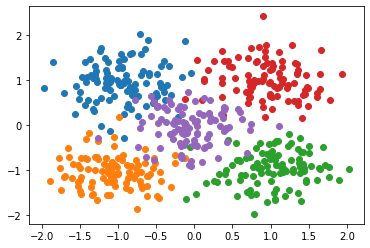

In [31]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]   #Five distinct data classes. These were chosen to create small degree of separation of between the data. 
X, Y = datasets.make_blobs(n_samples = n_pts, random_state=123, centers=centers, cluster_std=0.4)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])

In [32]:
Y_cat = to_categorical(Y, 5)
print(Y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [33]:
model = Sequential()
model.add(Dense(units = 5, input_shape=(2, ), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(x=X, y=Y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5687 - accuracy: 0.3480
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7253 - accuracy: 0.7880
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8920
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.9360
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.9460
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.9500
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9500
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9440
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9420
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9460
Epoch 11/

In [35]:
def plot_decision_boundary(X, Y_cat, model):
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  classes_func = np.argmax(pred_func, axis=1)
  z = classes_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

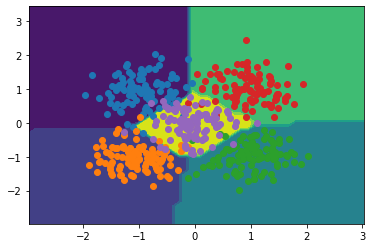

In [36]:
plot_decision_boundary(X, Y_cat, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])

Prediction is: [3]


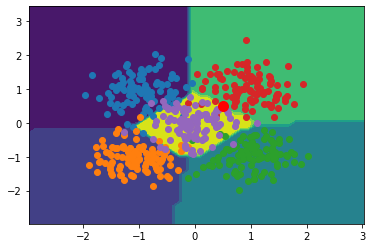

In [37]:
plot_decision_boundary(X, Y_cat, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.scatter(X[Y==2, 0], X[Y==2, 1])
plt.scatter(X[Y==3, 0], X[Y==3, 1])
plt.scatter(X[Y==4, 0], X[Y==4, 1])
x = 0.5
y = 0.5
point = np.array([[x, y]])
pred = model.predict(point)
prediction = np.argmax(pred, axis=1)
plt.plot([x], [y], marker = "o", markersize=10, color="red")
print("Prediction is:", prediction)